## LSTM AE

Load Dataset

In [16]:
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_train) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28,28, 1))
x_test = np.reshape(x_test, (len(x_test), 28,28, 1))
print(x_train.shape)
print(x_test.shape)


(60000, 28, 28, 1)
(10000, 28, 28, 1)


### Define LSTM AE Model

In [17]:
import keras
from keras import layers

timesteps = 28  # Length of your sequences
input_dim = 28
latent_dim = 32

inputs = keras.Input(shape=(timesteps, input_dim))
encoded = layers.LSTM(latent_dim)(inputs)

decoded = layers.RepeatVector(timesteps)(encoded)
decoded = layers.LSTM(input_dim, return_sequences=True)(decoded)

model_lstmAE = keras.Model(inputs, decoded)
model_lstmAE_encoder = keras.Model(inputs, encoded)

## Training and Testing

In [18]:
from keras.callbacks import TensorBoard

model_lstmAE.compile(optimizer='adam', loss='binary_crossentropy')

model_lstmAE.fit(x_train, x_train,
                epochs=10,
                batch_size=128,
                shuffle=True,
                validation_data=(x_test, x_test),
                callbacks=[TensorBoard(log_dir='/tmp/model_convAE')])

Epoch 1/10
469/469 [==============================] - 22s 39ms/step - loss: 0.4922 - val_loss: 0.2728
Epoch 2/10
469/469 [==============================] - 17s 37ms/step - loss: 0.2648 - val_loss: 0.2512
Epoch 3/10
469/469 [==============================] - 17s 37ms/step - loss: 0.2495 - val_loss: 0.2428
Epoch 4/10
469/469 [==============================] - 17s 36ms/step - loss: 0.2441 - val_loss: 0.2727
Epoch 5/10
469/469 [==============================] - 17s 37ms/step - loss: 0.2632 - val_loss: 0.2462
Epoch 6/10
469/469 [==============================] - 17s 36ms/step - loss: 0.3089 - val_loss: 0.2816
Epoch 7/10
469/469 [==============================] - 17s 36ms/step - loss: 0.2748 - val_loss: 0.2567
Epoch 8/10
469/469 [==============================] - 17s 37ms/step - loss: 0.2529 - val_loss: 0.2434
Epoch 9/10
469/469 [==============================] - 17s 37ms/step - loss: 0.2432 - val_loss: 0.2371
Epoch 10/10
469/469 [==============================] - 17s 37ms/step - loss: 0.237

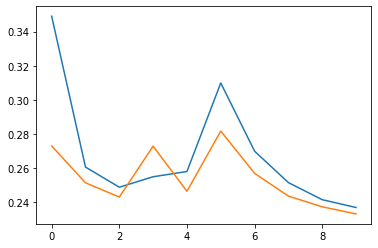

In [19]:
plt.plot(model_lstmAE.history.history["loss"])
plt.plot(model_lstmAE.history.history["val_loss"])

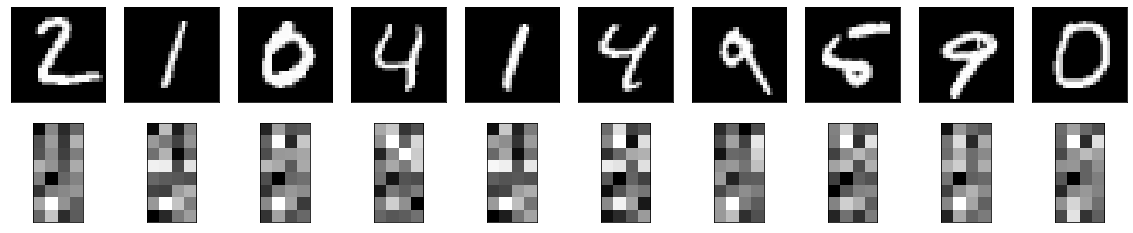

In [23]:
decoded_imgs = model_lstmAE_encoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(1, n + 1):
    # Display original
    ax = plt.subplot(2, n, i)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + n)
    plt.imshow(decoded_imgs[i].reshape(8, 4))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

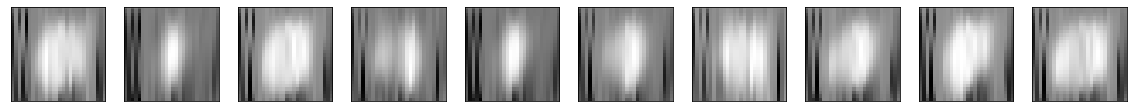

In [25]:
encoded_imgs = model_lstmAE.predict(x_test)

n = 10
plt.figure(figsize=(20, 8))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(encoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()